# Project

In [1]:
# import necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Assign each link to a placeholder 
dataset_1 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv'
dataset_2 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv'
dataset_3 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv'

In [3]:
# Read the datasets into DataFrames
df1 = pd.read_csv(dataset_1)
df2 = pd.read_csv(dataset_2)
df3 = pd.read_csv(dataset_3)

In [4]:
# open each to find what they have in common 
df1.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a85886e54beabf90154c0a29ae757c0     301965204           2   
2  8a8588f35438fe12015444567666018e     301966580           7   
3  8a85890754145ace015429211b513e16     301999343           3   
4  8a858970548359cc0154883481981866     301962360           9   

                 approveddate                creationdate  loanamount  \
0  2017-07-25 08:22:56.000000  2017-07-25 07:22:47.000000     30000.0   
1  2017-07-05 17:04:41.000000  2017-07-05 16:04:18.000000     15000.0   
2  2017-07-06 14:52:57.000000  2017-07-06 13:52:51.000000     20000.0   
3  2017-07-27 19:00:41.000000  2017-07-27 18:00:35.000000     10000.0   
4  2017-07-03 23:42:45.000000  2017-07-03 22:42:39.000000     40000.0   

   totaldue  termdays referredby good_bad_flag  
0   34500.0        30        NaN          Good  
1   17250.0        30        NaN          Good  
2   22250.0        15        NaN          Good  
3   11500.0        15        NaN          Good  
4   44000.0        30        NaN          Good

In [5]:
df2.head()

customerid                   birthdate  \
0  8a858e135cb22031015cbafc76964ebd  1973-10-10 00:00:00.000000   
1  8a858e275c7ea5ec015c82482d7c3996  1986-01-21 00:00:00.000000   
2  8a858e5b5bd99460015bdc95cd485634  1987-04-01 00:00:00.000000   
3  8a858efd5ca70688015cabd1f1e94b55  1991-07-19 00:00:00.000000   
4  8a858e785acd3412015acd48f4920d04  1982-11-22 00:00:00.000000   

  bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
0           Savings       3.319219      6.528604           GT Bank   
1           Savings       3.325598      7.119403     Sterling Bank   
2           Savings       5.746100      5.563174     Fidelity Bank   
3           Savings       3.362850      6.642485           GT Bank   
4           Savings       8.455332     11.971410           GT Bank   

  bank_branch_clients employment_status_clients level_of_education_clients  
0                 NaN                       NaN                        NaN  
1                 NaN                 Permanent                        NaN  
2                 NaN                       NaN                        NaN  
3                 NaN                 Permanent                        NaN  
4                 NaN                 Permanent                        NaN

In [6]:
df3.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301682320           2   
1  8a2a81a74ce8c05d014cfb32a0da1049     301883808           9   
2  8a2a81a74ce8c05d014cfb32a0da1049     301831714           8   
3  8a8588f35438fe12015444567666018e     301861541           5   
4  8a85890754145ace015429211b513e16     301941754           2   

                 approveddate                creationdate  loanamount  \
0  2016-08-15 18:22:40.000000  2016-08-15 17:22:32.000000     10000.0   
1  2017-04-28 18:39:07.000000  2017-04-28 17:38:53.000000     10000.0   
2  2017-03-05 10:56:25.000000  2017-03-05 09:56:19.000000     20000.0   
3  2017-04-09 18:25:55.000000  2017-04-09 17:25:42.000000     10000.0   
4  2017-06-17 09:29:57.000000  2017-06-17 08:29:50.000000     10000.0   

   totaldue  termdays                  closeddate referredby  \
0   13000.0        30  2016-09-01 16:06:48.000000        NaN   
1   13000.0        30  2017-05-28 14:44:49.000000        NaN   
2   23800.0        30  2017-04-26 22:18:56.000000        NaN   
3   11500.0        15  2017-04-24 01:35:52.000000        NaN   
4   11500.0        15  2017-07-14 21:18:43.000000        NaN   

                 firstduedate             firstrepaiddate  
0  2016-09-14 00:00:00.000000  2016-09-01 15:51:43.000000  
1  2017-05-30 00:00:00.000000  2017-05-26 00:00:00.000000  
2  2017-04-04 00:00:00.000000  2017-04-26 22:03:47.000000  
3  2017-04-24 00:00:00.000000  2017-04-24 00:48:43.000000  
4  2017-07-03 00:00:00.000000  2017-07-14 21:08:35.000000

In [7]:
# both df1 and df3 have similar column names, adding prev to know the difference 
newdf3 = df3.columns[0]
df3.columns = [newdf3] + ['prev_' + col for col in df3.columns[1:]]

In [8]:
df3.head()

customerid  prev_systemloanid  prev_loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049          301682320                2   
1  8a2a81a74ce8c05d014cfb32a0da1049          301883808                9   
2  8a2a81a74ce8c05d014cfb32a0da1049          301831714                8   
3  8a8588f35438fe12015444567666018e          301861541                5   
4  8a85890754145ace015429211b513e16          301941754                2   

            prev_approveddate           prev_creationdate  prev_loanamount  \
0  2016-08-15 18:22:40.000000  2016-08-15 17:22:32.000000          10000.0   
1  2017-04-28 18:39:07.000000  2017-04-28 17:38:53.000000          10000.0   
2  2017-03-05 10:56:25.000000  2017-03-05 09:56:19.000000          20000.0   
3  2017-04-09 18:25:55.000000  2017-04-09 17:25:42.000000          10000.0   
4  2017-06-17 09:29:57.000000  2017-06-17 08:29:50.000000          10000.0   

   prev_totaldue  prev_termdays             prev_closeddate prev_referredby  \
0        13000.0             30  2016-09-01 16:06:48.000000             NaN   
1        13000.0             30  2017-05-28 14:44:49.000000             NaN   
2        23800.0             30  2017-04-26 22:18:56.000000             NaN   
3        11500.0             15  2017-04-24 01:35:52.000000             NaN   
4        11500.0             15  2017-07-14 21:18:43.000000             NaN   

            prev_firstduedate        prev_firstrepaiddate  
0  2016-09-14 00:00:00.000000  2016-09-01 15:51:43.000000  
1  2017-05-30 00:00:00.000000  2017-05-26 00:00:00.000000  
2  2017-04-04 00:00:00.000000  2017-04-26 22:03:47.000000  
3  2017-04-24 00:00:00.000000  2017-04-24 00:48:43.000000  
4  2017-07-03 00:00:00.000000  2017-07-14 21:08:35.000000

In [9]:
# join all using customerid 
df = df1.merge(df2, on="customerid", how="inner").merge(df3, on="customerid", how="inner")

In [10]:
df.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
2  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
3  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
4  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   

                 approveddate                creationdate  loanamount  \
0  2017-07-25 08:22:56.000000  2017-07-25 07:22:47.000000     30000.0   
1  2017-07-25 08:22:56.000000  2017-07-25 07:22:47.000000     30000.0   
2  2017-07-25 08:22:56.000000  2017-07-25 07:22:47.000000     30000.0   
3  2017-07-25 08:22:56.000000  2017-07-25 07:22:47.000000     30000.0   
4  2017-07-25 08:22:56.000000  2017-07-25 07:22:47.000000     30000.0   

   totaldue  termdays referredby good_bad_flag  ... prev_loannumber  \
0   34500.0        30        NaN          Good  ...               2   
1   34500.0        30        NaN          Good  ...               9   
2   34500.0        30        NaN          Good  ...               8   
3   34500.0        30        NaN          Good  ...              10   
4   34500.0        30        NaN          Good  ...              11   

            prev_approveddate           prev_creationdate  prev_loanamount  \
0  2016-08-15 18:22:40.000000  2016-08-15 17:22:32.000000          10000.0   
1  2017-04-28 18:39:07.000000  2017-04-28 17:38:53.000000          10000.0   
2  2017-03-05 10:56:25.000000  2017-03-05 09:56:19.000000          20000.0   
3  2017-06-01 13:34:30.000000  2017-06-01 12:34:21.000000          20000.0   
4  2017-06-28 10:58:34.000000  2017-06-28 09:58:25.000000          20000.0   

  prev_totaldue prev_termdays             prev_closeddate prev_referredby  \
0       13000.0            30  2016-09-01 16:06:48.000000             NaN   
1       13000.0            30  2017-05-28 14:44:49.000000             NaN   
2       23800.0            30  2017-04-26 22:18:56.000000             NaN   
3       24500.0            30  2017-06-25 15:24:06.000000             NaN   
4       24500.0            30  2017-07-25 08:14:36.000000             NaN   

            prev_firstduedate        prev_firstrepaiddate  
0  2016-09-14 00:00:00.000000  2016-09-01 15:51:43.000000  
1  2017-05-30 00:00:00.000000  2017-05-26 00:00:00.000000  
2  2017-04-04 00:00:00.000000  2017-04-26 22:03:47.000000  
3  2017-07-03 00:00:00.000000  2017-06-25 15:13:56.000000  
4  2017-07-31 00:00:00.000000  2017-07-25 08:04:27.000000  

[5 rows x 29 columns]

### Data Cleaning and Exploratory Data Analysis 

In [11]:
# the total number of rows and columns 
df.shape

(13693, 29)

In [12]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13693 entries, 0 to 13692
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  13693 non-null  object 
 1   systemloanid                13693 non-null  int64  
 2   loannumber                  13693 non-null  int64  
 3   approveddate                13693 non-null  object 
 4   creationdate                13693 non-null  object 
 5   loanamount                  13693 non-null  float64
 6   totaldue                    13693 non-null  float64
 7   termdays                    13693 non-null  int64  
 8   referredby                  802 non-null    object 
 9   good_bad_flag               13693 non-null  object 
 10  birthdate                   13693 non-null  object 
 11  bank_account_type           13693 non-null  object 
 12  longitude_gps               13693 non-null  float64
 13  latitude_gps                136

In [13]:
# Missing values 
df.isna().sum().sort_values(ascending=False)

bank_branch_clients           13589
prev_referredby               12891
referredby                    12891
level_of_education_clients    10229
employment_status_clients      1363
customerid                        0
prev_firstduedate                 0
prev_closeddate                   0
prev_termdays                     0
prev_totaldue                     0
prev_loanamount                   0
prev_creationdate                 0
prev_approveddate                 0
prev_loannumber                   0
prev_systemloanid                 0
bank_name_clients                 0
systemloanid                      0
latitude_gps                      0
longitude_gps                     0
bank_account_type                 0
birthdate                         0
good_bad_flag                     0
termdays                          0
totaldue                          0
loanamount                        0
creationdate                      0
approveddate                      0
loannumber                  

In [14]:
len(df)

13693

In [15]:
# Percentage of the missing values
(df.isna().sum().sort_values(ascending=False)/len(df)) * 100 

bank_branch_clients           99.240488
prev_referredby               94.142993
referredby                    94.142993
level_of_education_clients    74.702403
employment_status_clients      9.953991
customerid                     0.000000
prev_firstduedate              0.000000
prev_closeddate                0.000000
prev_termdays                  0.000000
prev_totaldue                  0.000000
prev_loanamount                0.000000
prev_creationdate              0.000000
prev_approveddate              0.000000
prev_loannumber                0.000000
prev_systemloanid              0.000000
bank_name_clients              0.000000
systemloanid                   0.000000
latitude_gps                   0.000000
longitude_gps                  0.000000
bank_account_type              0.000000
birthdate                      0.000000
good_bad_flag                  0.000000
termdays                       0.000000
totaldue                       0.000000
loanamount                     0.000000


In [16]:
# duplicate
df.duplicated().sum()

20

In [17]:
# descriptive statistics
df.describe().T

count          mean           std           min  \
systemloanid       13693.0  3.019801e+08  13435.313603  3.019585e+08   
loannumber         13693.0  8.401081e+00      4.318780  2.000000e+00   
loanamount         13693.0  2.568867e+04  12625.374212  1.000000e+04   
totaldue           13693.0  2.981267e+04  13772.770273  1.000000e+04   
termdays           13693.0  3.323377e+01     14.440482  1.500000e+01   
longitude_gps      13693.0  4.482207e+00      8.639590 -1.182470e+02   
latitude_gps       13693.0  7.291442e+00      3.436232 -3.386882e+01   
prev_systemloanid  13693.0  3.018395e+08  93046.899548  3.016001e+08   
prev_loannumber    13693.0  4.200760e+00      3.269552  1.000000e+00   
prev_loanamount    13693.0  1.656635e+04   9375.687619  3.000000e+03   
prev_totaldue      13693.0  1.964661e+04  10512.238823  3.900000e+03   
prev_termdays      13693.0  2.674213e+01     10.997624  1.500000e+01   

                            25%           50%           75%           max  
systemloanid       3.019678e+08  3.019787e+08  3.019929e+08  3.020040e+08  
loannumber         5.000000e+00  8.000000e+00  1.100000e+01  2.700000e+01  
loanamount         1.000000e+04  3.000000e+04  4.000000e+04  6.000000e+04  
totaldue           1.300000e+04  3.300000e+04  4.400000e+04  6.810000e+04  
termdays           3.000000e+01  3.000000e+01  3.000000e+01  9.000000e+01  
longitude_gps      3.354793e+00  3.576022e+00  6.364658e+00  1.512093e+02  
latitude_gps       6.471885e+00  6.617633e+00  7.421333e+00  7.122807e+01  
prev_systemloanid  3.017767e+08  3.018545e+08  3.019193e+08  3.020003e+08  
prev_loannumber    2.000000e+00  3.000000e+00  6.000000e+00  2.600000e+01  
prev_loanamount    1.000000e+04  1.000000e+04  2.000000e+04  6.000000e+04  
prev_totaldue      1.150000e+04  1.300000e+04  2.450000e+04  6.810000e+04  
prev_termdays      1.500000e+01  3.000000e+01  3.000000e+01  9.000000e+01

- We have missing values
- We have duplicates
- change datatype

In [18]:
# drop duplicate
df.drop_duplicates(inplace=True)

In [19]:
# check
df.duplicated().sum()

0

In [20]:
# drops columns with missing values above 80
df.drop(columns=['bank_branch_clients','referredby','prev_referredby'], inplace=True)

In [21]:
# Missing values 
df.isna().sum().sort_values(ascending=False)

level_of_education_clients    10209
employment_status_clients      1363
customerid                        0
systemloanid                      0
prev_firstduedate                 0
prev_closeddate                   0
prev_termdays                     0
prev_totaldue                     0
prev_loanamount                   0
prev_creationdate                 0
prev_approveddate                 0
prev_loannumber                   0
prev_systemloanid                 0
bank_name_clients                 0
latitude_gps                      0
longitude_gps                     0
bank_account_type                 0
birthdate                         0
good_bad_flag                     0
termdays                          0
totaldue                          0
loanamount                        0
creationdate                      0
approveddate                      0
loannumber                        0
prev_firstrepaiddate              0
dtype: int64

In [22]:
df.level_of_education_clients.unique()

array(['Post-Graduate', nan, 'Primary', 'Graduate', 'Secondary'],
      dtype=object)

In [23]:
df.employment_status_clients.unique()

array(['Permanent', nan, 'Unemployed', 'Self-Employed', 'Student',
       'Retired', 'Contract'], dtype=object)

In [24]:
# Handle missing values (mode/median imputation)
df['level_of_education_clients'].mode()

0    Graduate
Name: level_of_education_clients, dtype: object

In [25]:
df['employment_status_clients'].mode()

0    Permanent
Name: employment_status_clients, dtype: object

In [26]:
df['level_of_education_clients'].fillna(df['level_of_education_clients'].mode()[0], inplace=True)

In [27]:
df['employment_status_clients'].fillna(df['employment_status_clients'].mode()[0], inplace=True)

In [28]:
df.isna().sum().sort_values(ascending=False)

customerid                    0
systemloanid                  0
prev_firstduedate             0
prev_closeddate               0
prev_termdays                 0
prev_totaldue                 0
prev_loanamount               0
prev_creationdate             0
prev_approveddate             0
prev_loannumber               0
prev_systemloanid             0
level_of_education_clients    0
employment_status_clients     0
bank_name_clients             0
latitude_gps                  0
longitude_gps                 0
bank_account_type             0
birthdate                     0
good_bad_flag                 0
termdays                      0
totaldue                      0
loanamount                    0
creationdate                  0
approveddate                  0
loannumber                    0
prev_firstrepaiddate          0
dtype: int64

In [29]:
datetime_cols = ['prev_creationdate', 'prev_closeddate', 'prev_firstduedate', 'prev_firstrepaiddate',
                 'approveddate','creationdate','prev_approveddate ']

In [30]:
# Convert datetime_cols to datetime
for col in datetime_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13692
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  13673 non-null  object        
 1   systemloanid                13673 non-null  int64         
 2   loannumber                  13673 non-null  int64         
 3   approveddate                13673 non-null  datetime64[ns]
 4   creationdate                13673 non-null  datetime64[ns]
 5   loanamount                  13673 non-null  float64       
 6   totaldue                    13673 non-null  float64       
 7   termdays                    13673 non-null  int64         
 8   good_bad_flag               13673 non-null  object        
 9   birthdate                   13673 non-null  object        
 10  bank_account_type           13673 non-null  object        
 11  longitude_gps               13673 non-null  float64       


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13692
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  13673 non-null  object        
 1   systemloanid                13673 non-null  int64         
 2   loannumber                  13673 non-null  int64         
 3   approveddate                13673 non-null  datetime64[ns]
 4   creationdate                13673 non-null  datetime64[ns]
 5   loanamount                  13673 non-null  float64       
 6   totaldue                    13673 non-null  float64       
 7   termdays                    13673 non-null  int64         
 8   good_bad_flag               13673 non-null  object        
 9   birthdate                   13673 non-null  object        
 10  bank_account_type           13673 non-null  object        
 11  longitude_gps               13673 non-null  float64       


In [33]:
# Assess class imbalance in 'loan_default'
df['good_bad_flag'].value_counts()

good_bad_flag
Good    11146
Bad      2527
Name: count, dtype: int64

In [34]:
# Compare default rates across education
education_default = df.groupby('level_of_education_clients')['good_bad_flag'].value_counts()
ed = pd.DataFrame(education_default)
ed

count
level_of_education_clients good_bad_flag       
Graduate                   Good           10400
                           Bad             2317
Post-Graduate              Good             346
                           Bad               89
Primary                    Good              35
                           Bad                1
Secondary                  Good             365
                           Bad              120

In [35]:
# Compare default rates across employment
employment_default = df.groupby('employment_status_clients')['good_bad_flag'].value_counts()
em = pd.DataFrame(employment_default)
em

count
employment_status_clients good_bad_flag       
Contract                  Good              10
Permanent                 Good            8481
                          Bad             2000
Retired                   Good              29
Self-Employed             Good            1972
                          Bad              347
Student                   Good             475
                          Bad              140
Unemployed                Good             179
                          Bad               40

In [36]:
# create the loan_default 
df['loan_default'] = df['good_bad_flag'].map({'Bad': 0, 'Good': 1})

In [37]:
df.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
2  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
3  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
4  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
1 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
2 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
3 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
4 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   

  good_bad_flag                   birthdate  ... prev_loannumber  \
0          Good  1972-01-15 00:00:00.000000  ...               2   
1          Good  1972-01-15 00:00:00.000000  ...               9   
2          Good  1972-01-15 00:00:00.000000  ...               8   
3          Good  1972-01-15 00:00:00.000000  ...              10   
4          Good  1972-01-15 00:00:00.000000  ...              11   

            prev_approveddate   prev_creationdate prev_loanamount  \
0  2016-08-15 18:22:40.000000 2016-08-15 17:22:32         10000.0   
1  2017-04-28 18:39:07.000000 2017-04-28 17:38:53         10000.0   
2  2017-03-05 10:56:25.000000 2017-03-05 09:56:19         20000.0   
3  2017-06-01 13:34:30.000000 2017-06-01 12:34:21         20000.0   
4  2017-06-28 10:58:34.000000 2017-06-28 09:58:25         20000.0   

  prev_totaldue prev_termdays     prev_closeddate  prev_firstduedate  \
0       13000.0            30 2016-09-01 16:06:48         2016-09-14   
1       13000.0            30 2017-05-28 14:44:49         2017-05-30   
2       23800.0            30 2017-04-26 22:18:56         2017-04-04   
3       24500.0            30 2017-06-25 15:24:06         2017-07-03   
4       24500.0            30 2017-07-25 08:14:36         2017-07-31   

  prev_firstrepaiddate loan_default  
0  2016-09-01 15:51:43            1  
1  2017-05-26 00:00:00            1  
2  2017-04-26 22:03:47            1  
3  2017-06-25 15:13:56            1  
4  2017-07-25 08:04:27            1  

[5 rows x 27 columns]

In [38]:
df.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'prev_systemloanid', 'prev_loannumber',
       'prev_approveddate', 'prev_creationdate', 'prev_loanamount',
       'prev_totaldue', 'prev_termdays', 'prev_closeddate',
       'prev_firstduedate', 'prev_firstrepaiddate', 'loan_default'],
      dtype='object')

In [39]:
df.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
2  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
3  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
4  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
1 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
2 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
3 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
4 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   

  good_bad_flag                   birthdate  ... prev_loannumber  \
0          Good  1972-01-15 00:00:00.000000  ...               2   
1          Good  1972-01-15 00:00:00.000000  ...               9   
2          Good  1972-01-15 00:00:00.000000  ...               8   
3          Good  1972-01-15 00:00:00.000000  ...              10   
4          Good  1972-01-15 00:00:00.000000  ...              11   

            prev_approveddate   prev_creationdate prev_loanamount  \
0  2016-08-15 18:22:40.000000 2016-08-15 17:22:32         10000.0   
1  2017-04-28 18:39:07.000000 2017-04-28 17:38:53         10000.0   
2  2017-03-05 10:56:25.000000 2017-03-05 09:56:19         20000.0   
3  2017-06-01 13:34:30.000000 2017-06-01 12:34:21         20000.0   
4  2017-06-28 10:58:34.000000 2017-06-28 09:58:25         20000.0   

  prev_totaldue prev_termdays     prev_closeddate  prev_firstduedate  \
0       13000.0            30 2016-09-01 16:06:48         2016-09-14   
1       13000.0            30 2017-05-28 14:44:49         2017-05-30   
2       23800.0            30 2017-04-26 22:18:56         2017-04-04   
3       24500.0            30 2017-06-25 15:24:06         2017-07-03   
4       24500.0            30 2017-07-25 08:14:36         2017-07-31   

  prev_firstrepaiddate loan_default  
0  2016-09-01 15:51:43            1  
1  2017-05-26 00:00:00            1  
2  2017-04-26 22:03:47            1  
3  2017-06-25 15:13:56            1  
4  2017-07-25 08:04:27            1  

[5 rows x 27 columns]

In [40]:
# numerical columns 
num_cols = ['loannumber','loanamount','totaldue','termdays','prev_loannumber','prev_loanamount','prev_termdays','prev_totaldue',
            'loan_default']

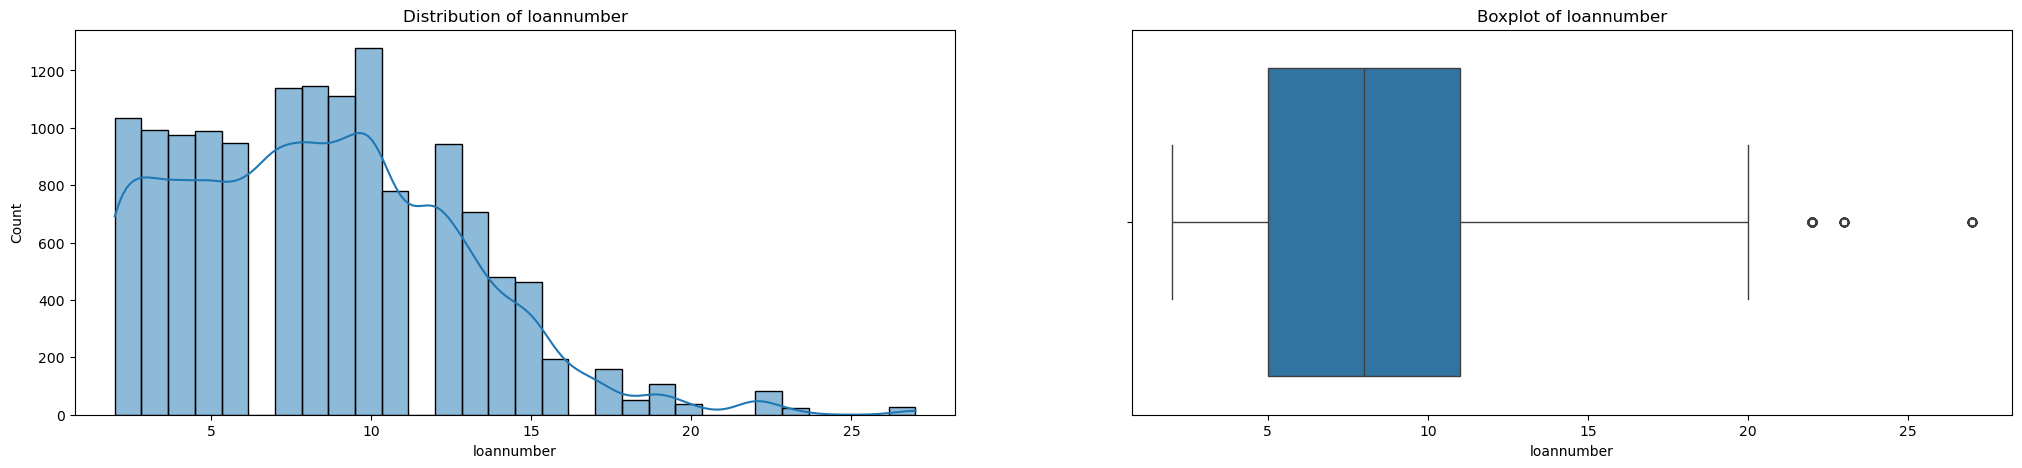

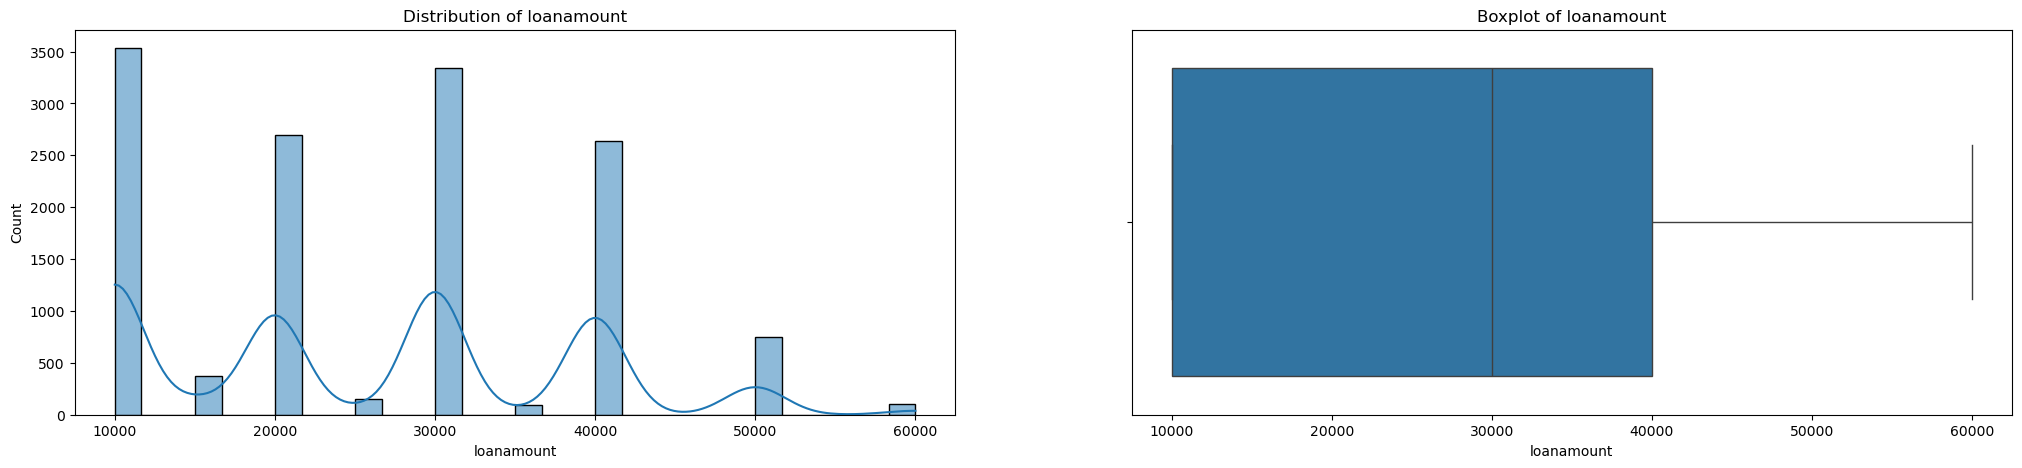

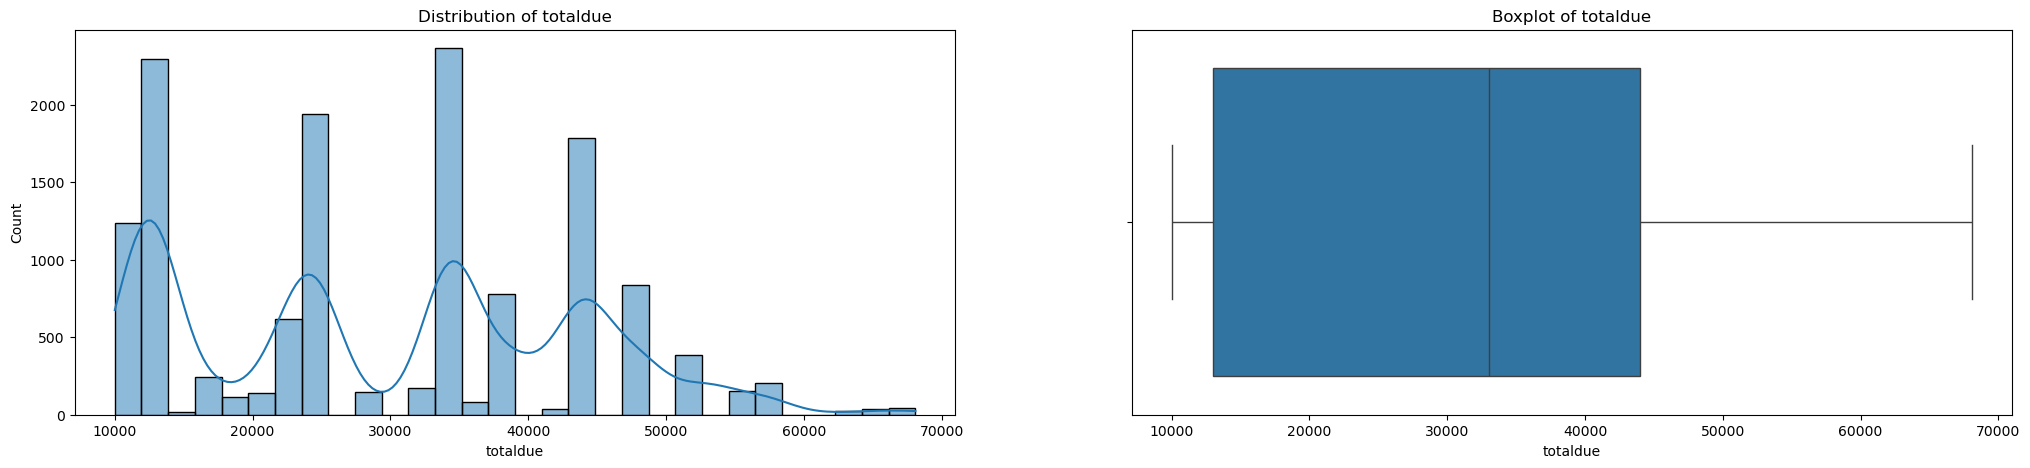

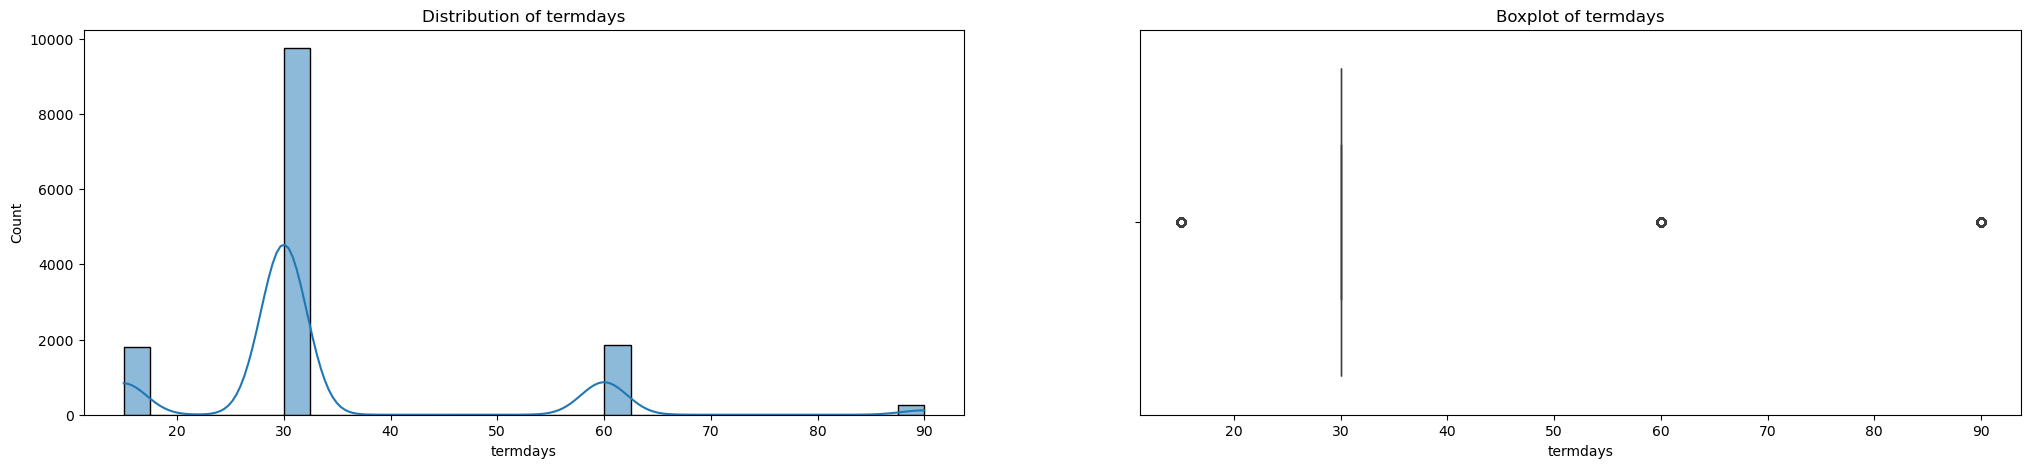

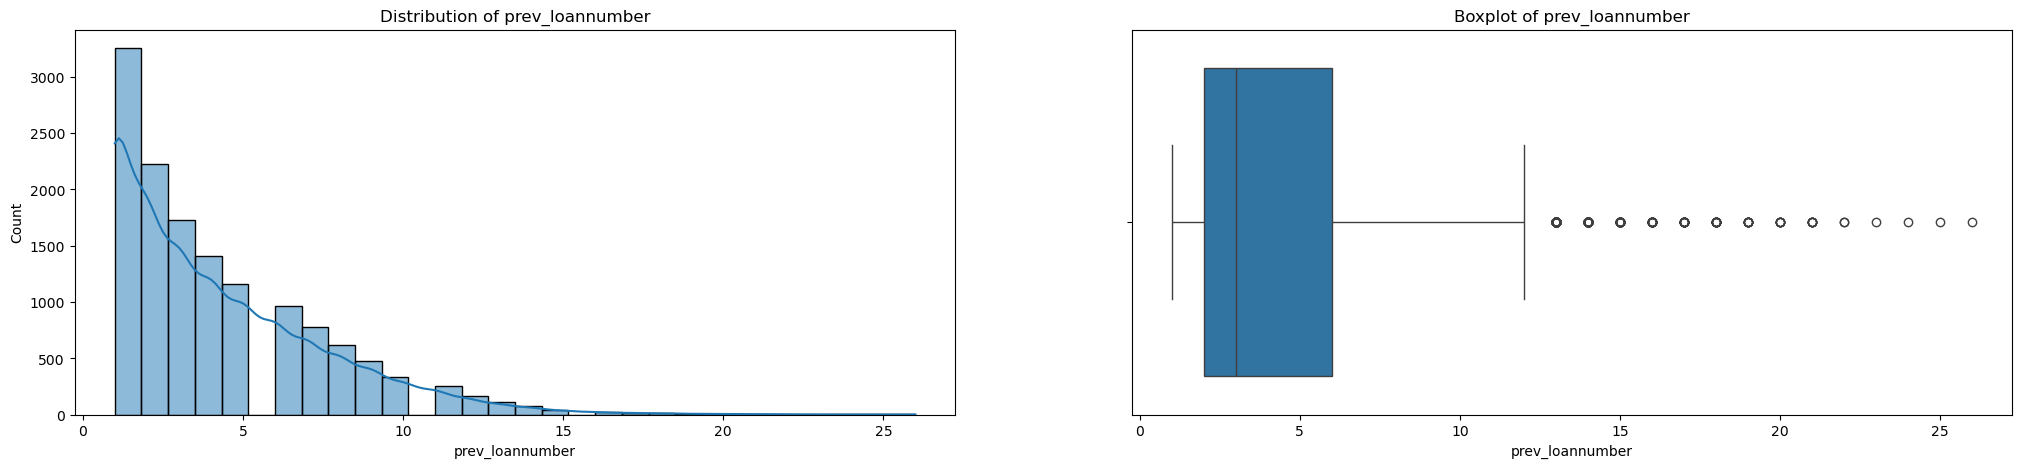

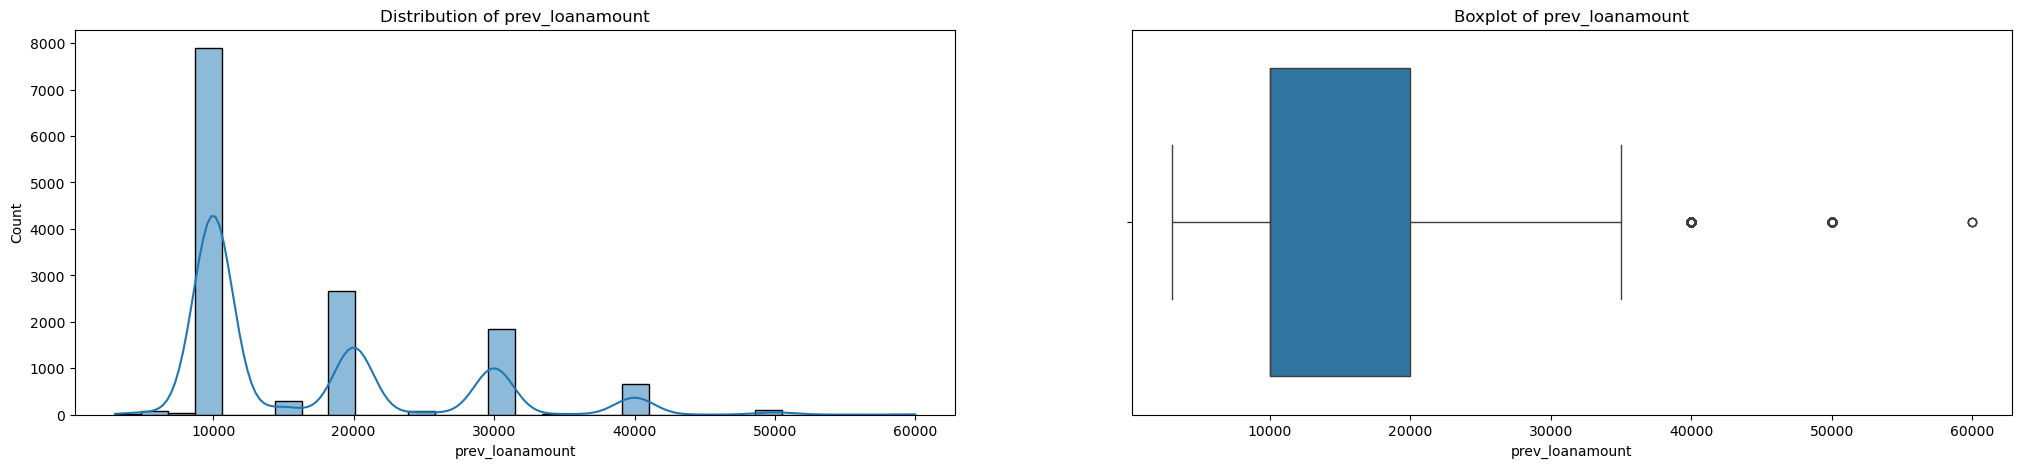

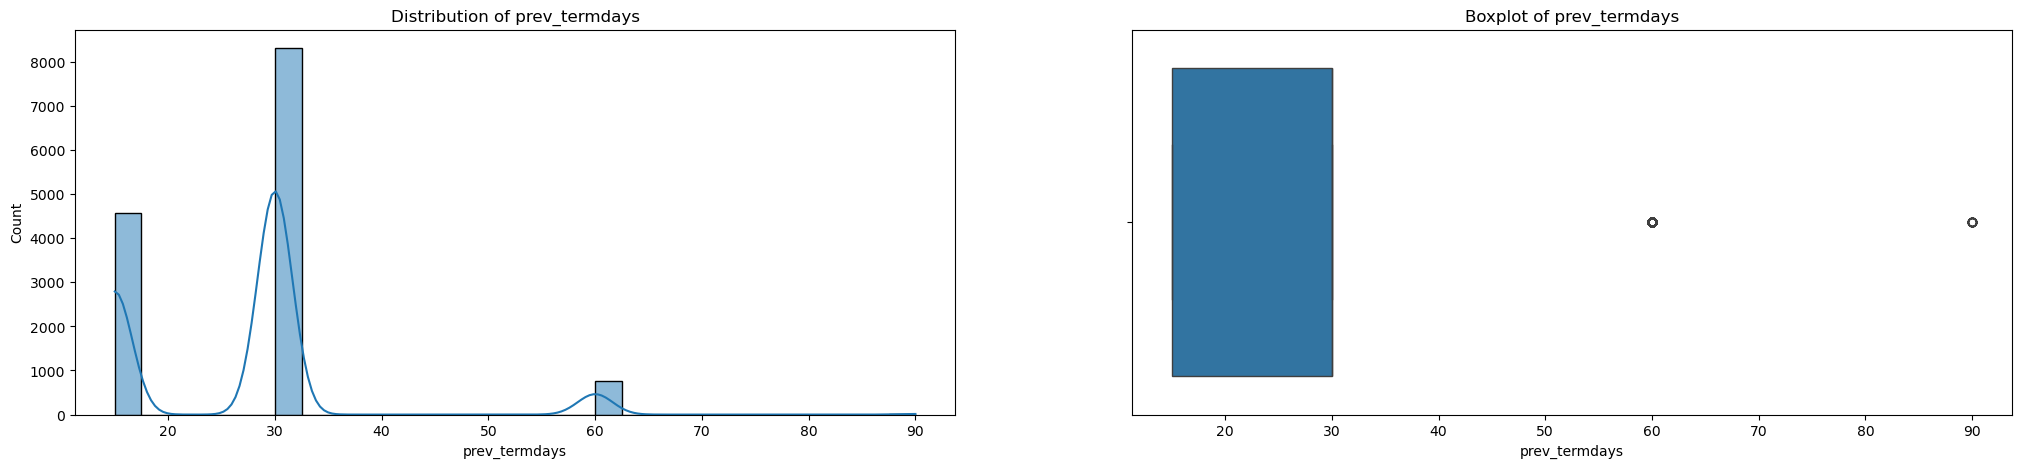

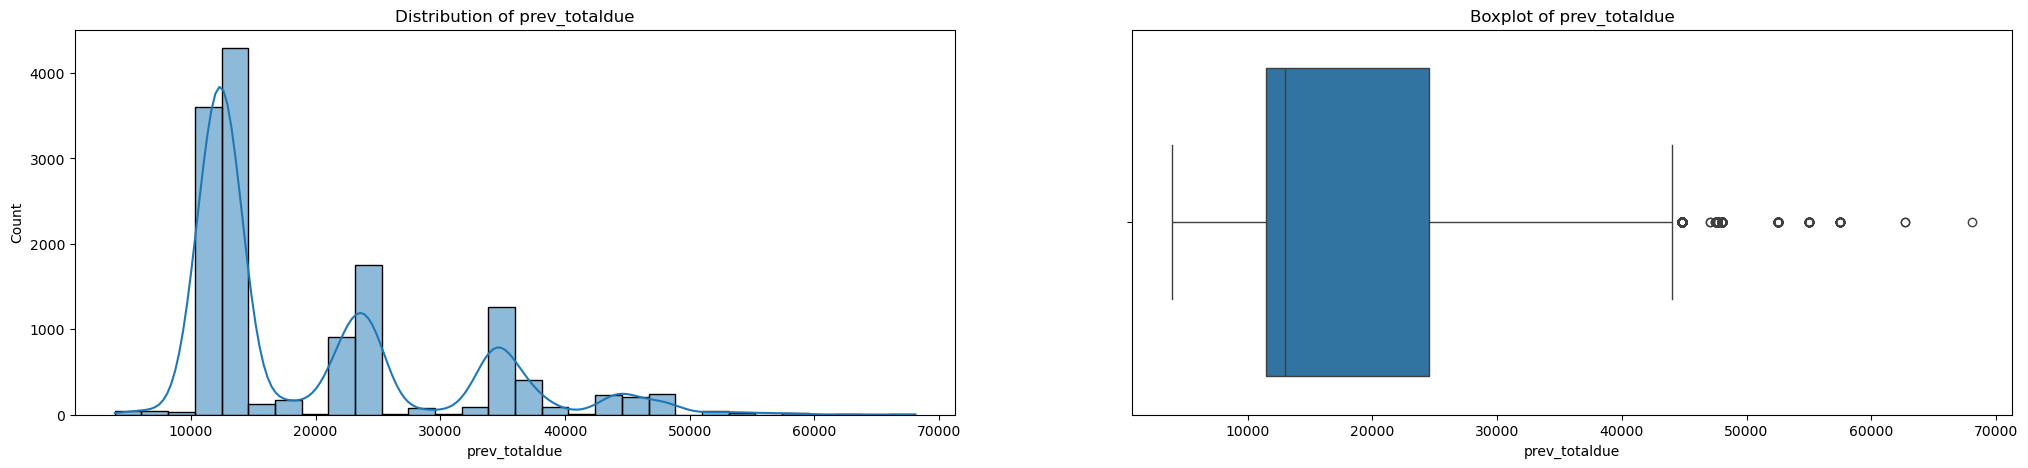

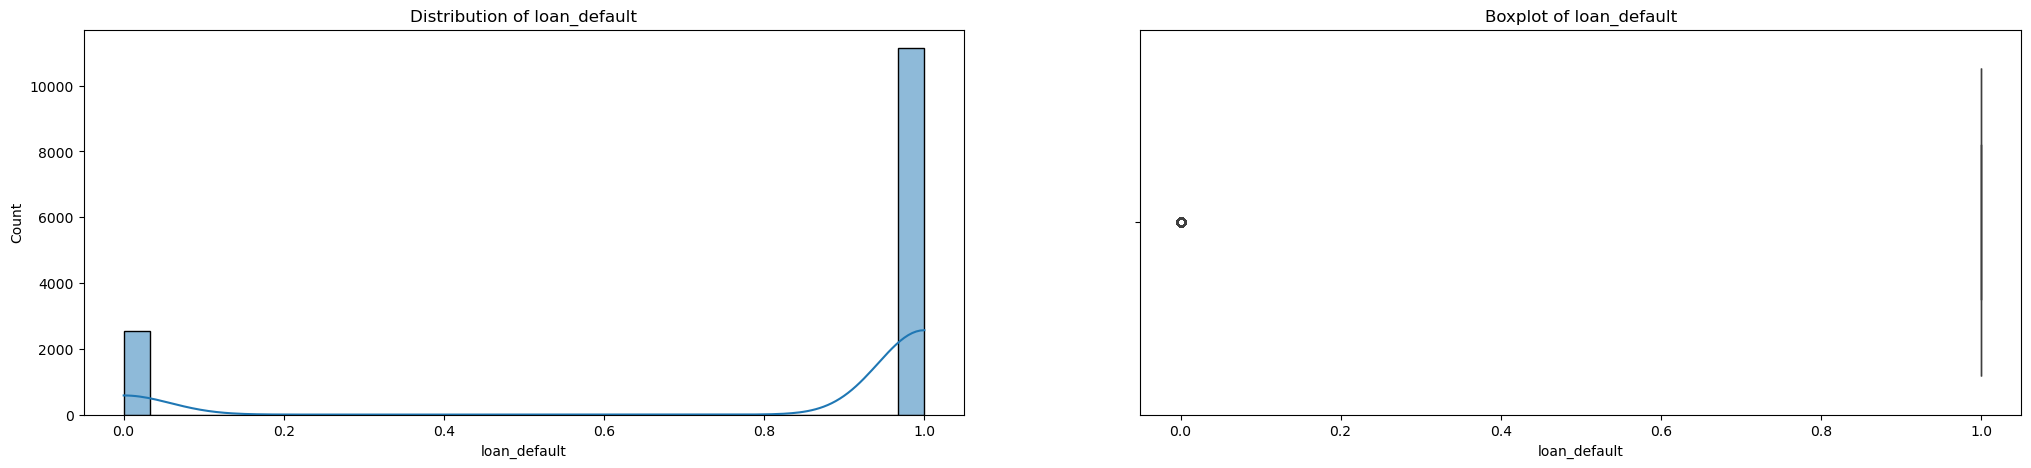

In [41]:
# distribution of our numeric columns

for col in num_cols:
    plt.figure(figsize=(25,5))
   # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data=df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
   
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

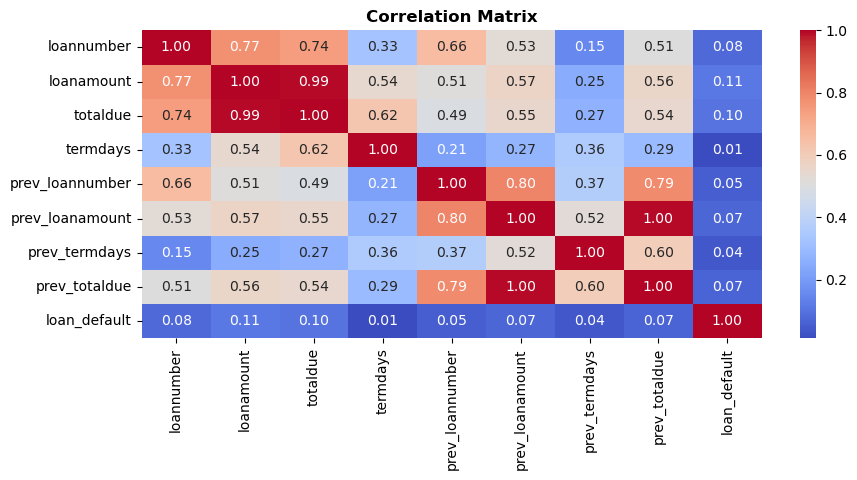

In [42]:
# Correlation matrix
plt.figure(figsize=(10,4))
heatmap= df[num_cols].corr()
sns.heatmap(data=heatmap, fmt= '.2f', annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontweight='bold')
plt.show()

### Feature Engineering

In [43]:
# get the age 
df['birthdate'] = pd.to_datetime(df['birthdate'], errors='coerce')
df['age'] = (pd.Timestamp.now() - df['birthdate']).dt.days // 365

In [44]:
df.age.unique()

array([53, 40, 47, 38, 36, 37, 42, 60, 48, 46, 43, 49, 39, 31, 33, 41, 34,
       44, 50, 63, 55, 45, 29, 51, 54, 30, 35, 58, 32, 59, 52, 57, 56, 62,
       61])

In [45]:
df.age.min()

29

In [46]:
df.age.max()

63

In [47]:
# how long it took them to pay off the previous loan 
df['prev_loan_paid_days'] = (pd.to_datetime(df['prev_closeddate']) - pd.to_datetime(df['prev_approveddate'])).dt.days

In [48]:
df.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
2  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
3  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
4  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
1 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
2 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
3 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
4 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   

  good_bad_flag  birthdate  ...   prev_creationdate  prev_loanamount  \
0          Good 1972-01-15  ... 2016-08-15 17:22:32          10000.0   
1          Good 1972-01-15  ... 2017-04-28 17:38:53          10000.0   
2          Good 1972-01-15  ... 2017-03-05 09:56:19          20000.0   
3          Good 1972-01-15  ... 2017-06-01 12:34:21          20000.0   
4          Good 1972-01-15  ... 2017-06-28 09:58:25          20000.0   

   prev_totaldue prev_termdays     prev_closeddate prev_firstduedate  \
0        13000.0            30 2016-09-01 16:06:48        2016-09-14   
1        13000.0            30 2017-05-28 14:44:49        2017-05-30   
2        23800.0            30 2017-04-26 22:18:56        2017-04-04   
3        24500.0            30 2017-06-25 15:24:06        2017-07-03   
4        24500.0            30 2017-07-25 08:14:36        2017-07-31   

   prev_firstrepaiddate  loan_default age prev_loan_paid_days  
0   2016-09-01 15:51:43             1  53                  16  
1   2017-05-26 00:00:00             1  53                  29  
2   2017-04-26 22:03:47             1  53                  52  
3   2017-06-25 15:13:56             1  53                  24  
4   2017-07-25 08:04:27             1  53                  26  

[5 rows x 29 columns]

In [49]:
# for risk band
df['diff_days'] = (df['prev_termdays'] - df['prev_loan_paid_days'])

In [50]:
df.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
2  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
3  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
4  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
1 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
2 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
3 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
4 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   

  good_bad_flag  birthdate  ... prev_loanamount  prev_totaldue  prev_termdays  \
0          Good 1972-01-15  ...         10000.0        13000.0             30   
1          Good 1972-01-15  ...         10000.0        13000.0             30   
2          Good 1972-01-15  ...         20000.0        23800.0             30   
3          Good 1972-01-15  ...         20000.0        24500.0             30   
4          Good 1972-01-15  ...         20000.0        24500.0             30   

      prev_closeddate prev_firstduedate prev_firstrepaiddate  loan_default  \
0 2016-09-01 16:06:48        2016-09-14  2016-09-01 15:51:43             1   
1 2017-05-28 14:44:49        2017-05-30  2017-05-26 00:00:00             1   
2 2017-04-26 22:18:56        2017-04-04  2017-04-26 22:03:47             1   
3 2017-06-25 15:24:06        2017-07-03  2017-06-25 15:13:56             1   
4 2017-07-25 08:14:36        2017-07-31  2017-07-25 08:04:27             1   

   age prev_loan_paid_days diff_days  
0   53                  16        14  
1   53                  29         1  
2   53                  52       -22  
3   53                  24         6  
4   53                  26         4  

[5 rows x 30 columns]

In [51]:
# creating payment_behavior_score
def payment_score(diff_days):
    if diff_days >= 1:
        return 'Low'
    elif diff_days == 0:
        return 'Medium'
    elif diff_days <= -1:
        return 'High'
    else:
        return 'Error'

In [52]:
def assign_risk_band(loanamount):
    if loanamount <= 10000:
        return 'Low'
    elif loanamount <= 30000:
        return 'Medium'
    elif loanamount > 30000:
        return 'High'
    else:
        return 'Error'

In [53]:
# Apply risk band 
df['risk_band'] = df['loanamount'].apply(assign_risk_band)

In [54]:
# Apply payment_behavior_score
df['payment_score'] = df['diff_days'].apply(payment_score)

In [55]:
df.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
2  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
3  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
4  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
1 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
2 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
3 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
4 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   

  good_bad_flag  birthdate  ... prev_termdays     prev_closeddate  \
0          Good 1972-01-15  ...            30 2016-09-01 16:06:48   
1          Good 1972-01-15  ...            30 2017-05-28 14:44:49   
2          Good 1972-01-15  ...            30 2017-04-26 22:18:56   
3          Good 1972-01-15  ...            30 2017-06-25 15:24:06   
4          Good 1972-01-15  ...            30 2017-07-25 08:14:36   

   prev_firstduedate prev_firstrepaiddate loan_default age  \
0         2016-09-14  2016-09-01 15:51:43            1  53   
1         2017-05-30  2017-05-26 00:00:00            1  53   
2         2017-04-04  2017-04-26 22:03:47            1  53   
3         2017-07-03  2017-06-25 15:13:56            1  53   
4         2017-07-31  2017-07-25 08:04:27            1  53   

   prev_loan_paid_days  diff_days risk_band payment_score  
0                   16         14    Medium           Low  
1                   29          1    Medium           Low  
2                   52        -22    Medium          High  
3                   24          6    Medium           Low  
4                   26          4    Medium           Low  

[5 rows x 32 columns]

In [56]:
df.columns 

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'prev_systemloanid', 'prev_loannumber',
       'prev_approveddate', 'prev_creationdate', 'prev_loanamount',
       'prev_totaldue', 'prev_termdays', 'prev_closeddate',
       'prev_firstduedate', 'prev_firstrepaiddate', 'loan_default', 'age',
       'prev_loan_paid_days', 'diff_days', 'risk_band', 'payment_score'],
      dtype='object')

<Axes: xlabel='good_bad_flag'>

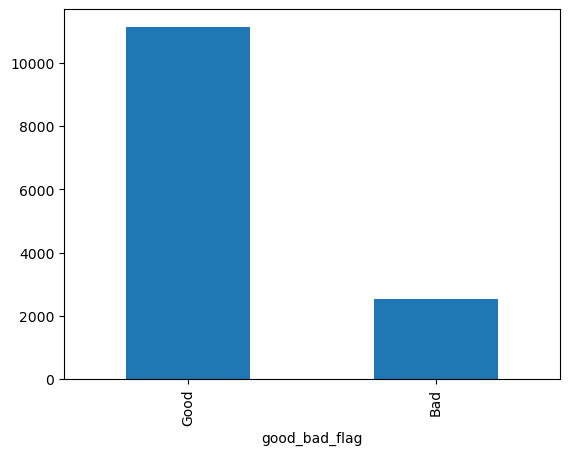

In [57]:
# Target Columns
df.good_bad_flag.value_counts().plot(kind='bar')

In [58]:
df.good_bad_flag.unique()

array(['Good', 'Bad'], dtype=object)

In [59]:
# convert text to number 
df.good_bad_flag = (df.good_bad_flag == 'Good').astype(int)

In [60]:
df.good_bad_flag.unique()

array([1, 0])

In [61]:
# other necessary Libraries 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.linear_model import LogisticRegression
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [62]:
# preprocessing 
x = df.drop(['good_bad_flag', 'customerid', 'systemloanid', 'prev_systemloanid'], axis=1)
Y = df['good_bad_flag']

In [63]:
# Split Data
x_train, x_test, Y_train, Y_test = train_test_split(x, Y,random_state=42)

In [64]:
# separate into cat and num cols
num_cols = x.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = x.select_dtypes(include='object').columns.tolist()

In [65]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ])

In [66]:
# Apply preprocessor
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

In [67]:
# Variance Threshold
selector = VarianceThreshold(threshold=0.2)
x_train_var = selector.fit_transform(x_train_transformed)
var_features = preprocessor.get_feature_names_out()[selector.get_support()]

In [68]:
# print Variance Threshold
print("Variance Threshold Features:", var_features)

Variance Threshold Features: ['num__loannumber' 'num__loanamount' 'num__totaldue' 'num__termdays'
 'num__longitude_gps' 'num__latitude_gps' 'num__prev_loannumber'
 'num__prev_loanamount' 'num__prev_totaldue' 'num__prev_termdays'
 'num__loan_default' 'num__age' 'num__prev_loan_paid_days'
 'num__diff_days' 'cat__bank_account_type_Other'
 'cat__bank_account_type_Savings' 'cat__bank_name_clients_GT Bank'
 'cat__risk_band_Medium' 'cat__payment_score_Low']


In [69]:
# RFE with Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(x_train_var, Y_train)
rfe_features = var_features[rfe.support_]

In [70]:
# print RFE
print("RFE Features:", rfe_features)

RFE Features: ['num__loan_default' 'num__age' 'num__prev_loan_paid_days'
 'cat__bank_account_type_Other' 'cat__bank_account_type_Savings'
 'cat__bank_name_clients_GT Bank' 'cat__risk_band_Medium'
 'cat__payment_score_Low']


In [71]:
# SHAP
model.fit(x_train_transformed, Y_train)
explainer = shap.LinearExplainer(model, x_train_transformed)
shap_values = explainer.shap_values(x_train_transformed)
shap_summary = np.abs(shap_values).mean(axis=0)  # Mean absolute SHAP values
top_features_idx = np.argsort(shap_summary)[-8:]
shap_features = preprocessor.get_feature_names_out()[top_features_idx]

In [72]:
# print SHAP
print("SHAP Features:", shap_features)

SHAP Features: ['cat__risk_band_High' 'cat__level_of_education_clients_Graduate'
 'cat__employment_status_clients_Permanent'
 'cat__bank_account_type_Savings' 'cat__risk_band_Medium'
 'cat__payment_score_Low' 'cat__bank_account_type_Other'
 'num__loan_default']


In [73]:
# Combine features
selected_features = list(set(var_features) | set(rfe_features) | set(shap_features))

FT = pd.DataFrame(selected_features)
FT

0
0             cat__bank_name_clients_GT Bank
1                       num__prev_loannumber
2                       num__prev_loanamount
3                            num__loanamount
4                     cat__payment_score_Low
5                        cat__risk_band_High
6                   num__prev_loan_paid_days
7                         num__prev_totaldue
8                          num__latitude_gps
9                              num__totaldue
10                         num__loan_default
11                        num__longitude_gps
12                           num__loannumber
13  cat__employment_status_clients_Permanent
14                     cat__risk_band_Medium
15            cat__bank_account_type_Savings
16  cat__level_of_education_clients_Graduate
17              cat__bank_account_type_Other
18                                  num__age
19                             num__termdays
20                        num__prev_termdays
21                            num__diff_days

### Data preparation

In [74]:
# other necessary Libraries 
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [75]:
# selecting features 
selected_features = ['loannumber', 'loanamount', 'termdays', 'good_bad_flag',
       'bank_account_type', 'bank_name_clients', 'totaldue','employment_status_clients',
       'level_of_education_clients',  'prev_loanamount','prev_totaldue', 'prev_termdays',
       'age','prev_loan_paid_days', 'diff_days', 'risk_band', 'payment_score']

In [76]:
# Create new DataFrame with selected features 
n_df = df[selected_features]

In [77]:
n_df.head()

loannumber  loanamount  termdays  good_bad_flag bank_account_type  \
0          12     30000.0        30              1             Other   
1          12     30000.0        30              1             Other   
2          12     30000.0        30              1             Other   
3          12     30000.0        30              1             Other   
4          12     30000.0        30              1             Other   

  bank_name_clients  totaldue employment_status_clients  \
0      Diamond Bank   34500.0                 Permanent   
1      Diamond Bank   34500.0                 Permanent   
2      Diamond Bank   34500.0                 Permanent   
3      Diamond Bank   34500.0                 Permanent   
4      Diamond Bank   34500.0                 Permanent   

  level_of_education_clients  prev_loanamount  prev_totaldue  prev_termdays  \
0              Post-Graduate          10000.0        13000.0             30   
1              Post-Graduate          10000.0        13000.0             30   
2              Post-Graduate          20000.0        23800.0             30   
3              Post-Graduate          20000.0        24500.0             30   
4              Post-Graduate          20000.0        24500.0             30   

   age  prev_loan_paid_days  diff_days risk_band payment_score  
0   53                   16         14    Medium           Low  
1   53                   29          1    Medium           Low  
2   53                   52        -22    Medium          High  
3   53                   24          6    Medium           Low  
4   53                   26          4    Medium           Low

In [78]:
# preprocessing 
X = n_df.drop(['good_bad_flag'], axis=1)
y = n_df['good_bad_flag']

In [79]:
# split the data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=42)

In [80]:
# separate into cat and num cols
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [81]:
# column transformer
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
])

In [82]:
# combine column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,numerical_cols),
    ('cat',cat_transformer,categorical_cols)
])

In [83]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['loannumber', 'loanamount', 'termdays',
                                  'totaldue', 'prev_loanamount',
                                  'prev_totaldue', 'prev_termdays', 'age',
                                  'prev_loan_paid_days', 'diff_days']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['bank_account_type', 'bank_name_clients',
                                  'employment_status_clients',
                                  'level_of_education_clients', 'risk_band',
                                  'payment_score'])])

In [84]:
# define the models
models = {
    ' Logistic Regression': LogisticRegression(),
    'Light': lgb.LGBMClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Boost': GradientBoostingClassifier(random_state=42),
    'Extreme': xgb.XGBClassifier(random_state=42)
}

[LightGBM] [Info] Number of positive: 10031, number of negative: 2274
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 472
[LightGBM] [Info] Number of data points in the train set: 12305, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.815197 -> initscore=1.484140
[LightGBM] [Info] Start training from score 1.484140


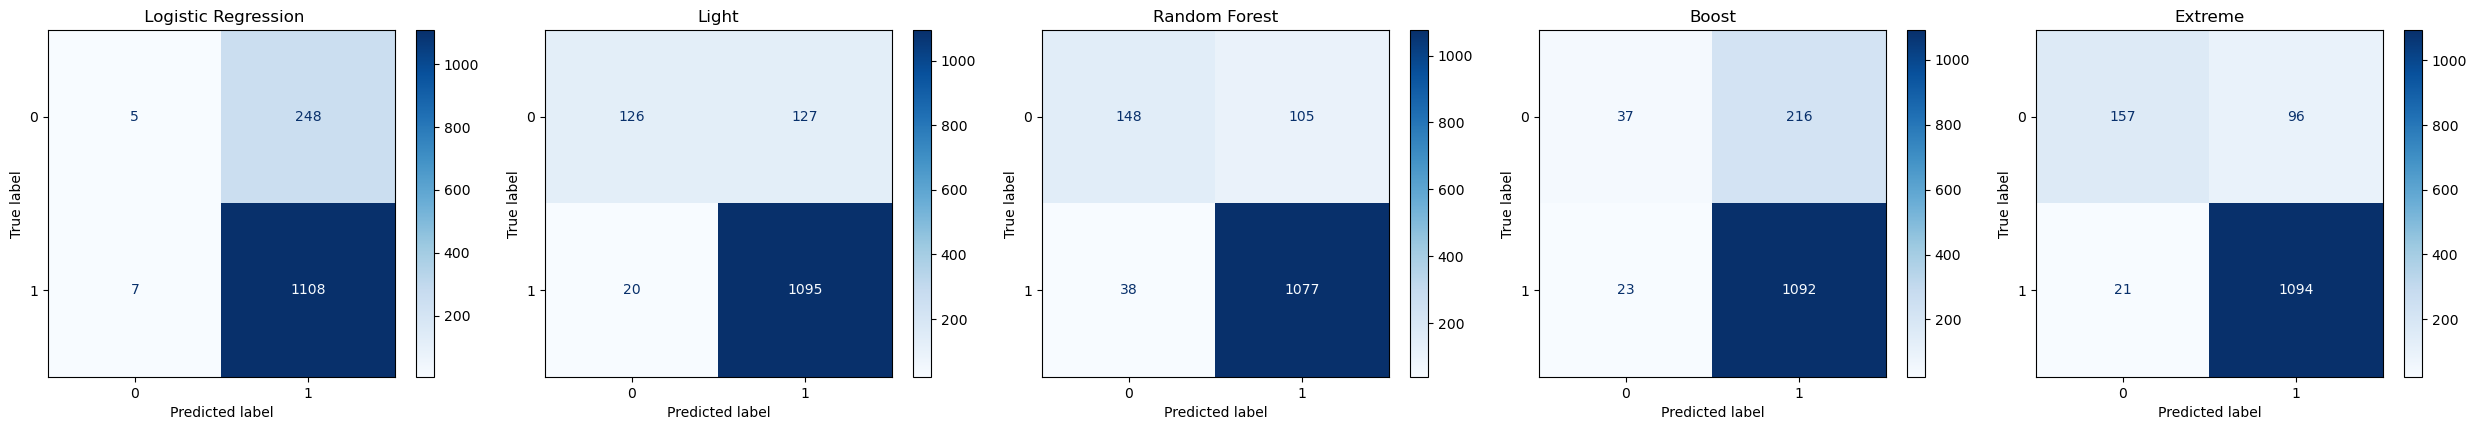


Classification Metrics


Logistic Regression  Light  Random Forest  Boost  Extreme
Accuracy                  0.814  0.893          0.895  0.825    0.914
Precision                 0.817  0.896          0.911  0.835    0.919
Recall                    0.994  0.982          0.966  0.979    0.981
F1-Score                  0.897  0.937          0.938  0.901    0.949
ROC AUC                   0.684  0.936          0.918  0.790    0.948

In [85]:
# using a for loop to evaluate our model
results = {}
fig, axes = plt.subplots(1, len(models), figsize=(len(models) * 5, 4))

for (name, model), ax in zip(models.items(), axes.flatten()):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict the training and test scores
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    #Evaluate the predictions
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # store the result
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
    }

    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()

# print metrics
print('\nClassification Metrics')
metrics_df = pd.DataFrame(results)
metrics_df.round(3)

### Blance the Traget Column

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
y_train.value_counts()

good_bad_flag
1    10031
0     2274
Name: count, dtype: int64

In [88]:
# Apply preorocessor and Smote 
smote = SMOTE(random_state=42)
x_train_processed = preprocessor.fit_transform(X_train) 
x_train_resample, y_train_resample = smote.fit_resample(x_train_processed, y_train)

In [89]:
y_train_resample.value_counts()

good_bad_flag
1    10031
0    10031
Name: count, dtype: int64

[LightGBM] [Info] Number of positive: 10031, number of negative: 10031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5561
[LightGBM] [Info] Number of data points in the train set: 20062, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


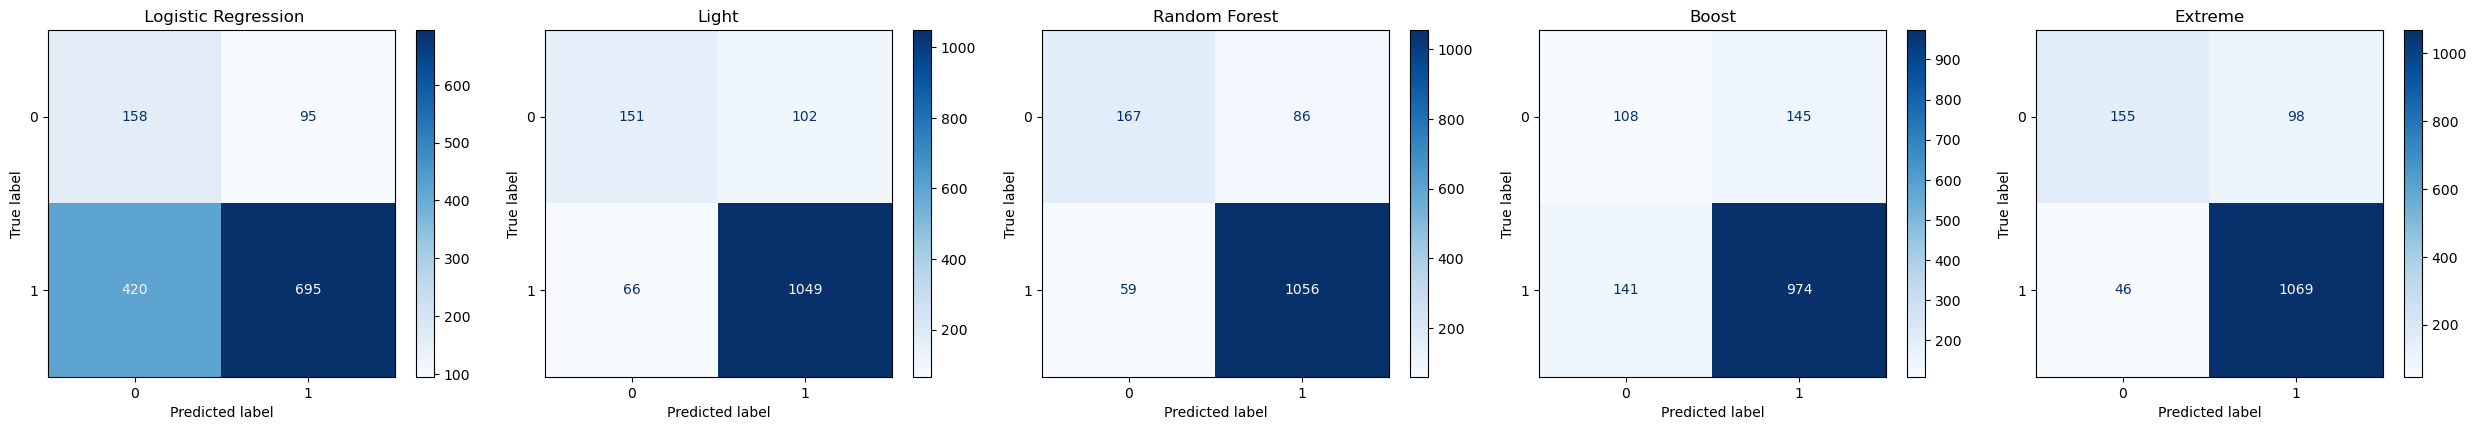


Classification Metrics


Logistic Regression  Light  Random Forest  Boost  Extreme
Accuracy                  0.624  0.877          0.894  0.791    0.895
Precision                 0.880  0.911          0.925  0.870    0.916
Recall                    0.623  0.941          0.947  0.874    0.959
F1-Score                  0.730  0.926          0.936  0.872    0.937
ROC AUC                   0.683  0.917          0.918  0.754    0.931

In [90]:
# Fit and transform data outside the loop
x_train_processed = preprocessor.fit_transform(X_train)
x_test_processed = preprocessor.transform(X_test)

# Apply SMOTE outside the loop
x_train_resample, y_train_resample = smote.fit_resample(x_train_processed, y_train)

# using a for loop to evaluate our model
results = {}
fig, axes = plt.subplots(1, len(models), figsize=(len(models) * 5, 4))

for (name, model), ax in zip(models.items(), axes.flatten()):
    # Define the pipeline with only the model
    pipeline = Pipeline(steps=[
        ('model', model)
    ])

    # Train the model using resampled data
    pipeline.fit(x_train_resample, y_train_resample)

    # Predict on the processed test data
    y_pred = pipeline.predict(x_test_processed)
    y_proba = pipeline.predict_proba(x_test_processed)[:, 1]

    #Evaluate the predictions
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # store the result
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
    }

    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()

# print metrics
print('\nClassification Metrics')
metrics_df = pd.DataFrame(results)
metrics_df.round(3)

### Stratified K-Fold Cross Validation

In [91]:
# Define the model(using random forest cause its the most accurate)
rf_model = RandomForestClassifier(random_state=42)

In [92]:
# Define Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [93]:
# Create a pipeline with a preprocessor and a RandomForestClassifier
pipeline_rf_skf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

In [94]:
# Perform cross-validation on the resampled data
cv_scores_rf_skf = cross_val_score(pipeline_rf_skf, X_train, y_train, cv=skf, scoring='accuracy')
print("Cross-validation accuracy scores (Random Forest with Stratified K-Fold):", cv_scores_rf_skf)
print("Mean cross-validation accuracy (Random Forest with Stratified K-Fold):", cv_scores_rf_skf.mean())

Cross-validation accuracy scores (Random Forest with Stratified K-Fold): [0.87931735 0.87403495 0.86915888 0.88866315 0.88663145]
Mean cross-validation accuracy (Random Forest with Stratified K-Fold): 0.879561154002438


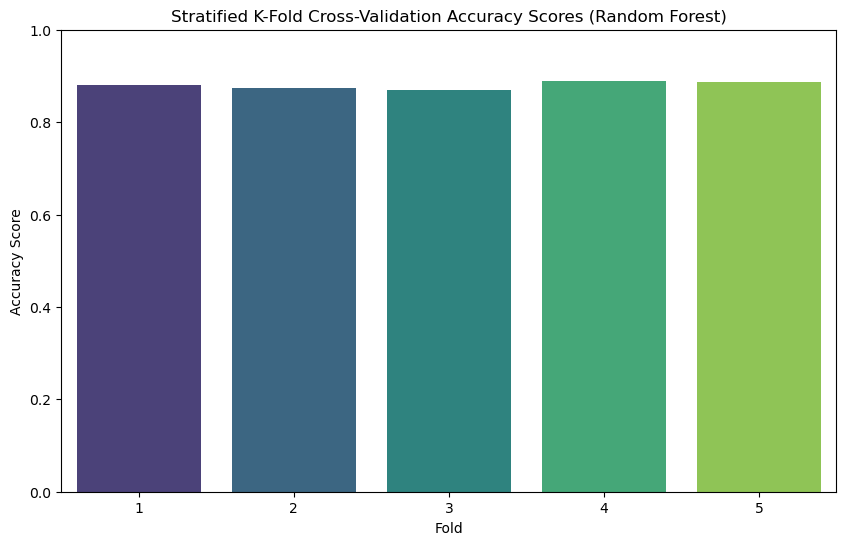

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(cv_scores_rf_skf) + 1)), y=cv_scores_rf_skf, palette='viridis')
plt.title('Stratified K-Fold Cross-Validation Accuracy Scores (Random Forest)')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

### Hyperparameter Turning 

In [96]:
# Fit the RandomForestClassifier model to the training data
model = RandomForestClassifier(random_state=42)
model.fit(x_train_resample, y_train_resample) 

RandomForestClassifier(random_state=42)

In [97]:
# Evaluate the model on the processed training data
train_pred = model.predict(x_train_processed)
train_score = accuracy_score( y_train,train_pred)

In [98]:
# Evaluate the model on the processed test data
test_pred = model.predict(x_test_processed)
test_score = accuracy_score(y_test,test_pred)

In [99]:
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

Training Accuracy: 0.9962
Test Accuracy: 0.8940


In [100]:
model = RandomForestClassifier(random_state=42)

# define our hyperparameter
parameters = {
    'n_estimators': range(5,50,5),
    'max_depth': range(2,11,2),
    'min_samples_leaf': [2,5,40]
}

# Perform GridSearchCV for hyperparameter tuning
search = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
search.fit(x_train_resample, y_train_resample) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 11, 2),
                         'min_samples_leaf': [2, 5, 40],
                         'n_estimators': range(5, 50, 5)},
             scoring='accuracy')

In [101]:
# Get the best model from GridSearchCV
best_model = search.best_estimator_
best_model

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=45,
                       random_state=42)

In [102]:
# Evaluate the best model on the processed training data
train_pred = best_model.predict(x_train_processed)
train_score = accuracy_score( y_train,train_pred)

# Evaluate the best model on the processed test data
test_pred = best_model.predict(x_test_processed)
test_score = accuracy_score(y_test,test_pred)

In [103]:
train_score, test_score

(0.8392523364485981, 0.8004385964912281)

### Feature importance

In [104]:
# Use the best model from GridSearchCV for SHAP analysis
final_model = search.best_estimator_
final_model.fit(x_train_resample,y_train_resample) 

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=45,
                       random_state=42)

In [105]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(x_train_processed)

In [106]:
# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

In [107]:
feature_names

array(['num__loannumber', 'num__loanamount', 'num__termdays',
       'num__totaldue', 'num__prev_loanamount', 'num__prev_totaldue',
       'num__prev_termdays', 'num__age', 'num__prev_loan_paid_days',
       'num__diff_days', 'cat__bank_account_type_Other',
       'cat__bank_account_type_Savings',
       'cat__bank_name_clients_Diamond Bank',
       'cat__bank_name_clients_EcoBank', 'cat__bank_name_clients_FCMB',
       'cat__bank_name_clients_Fidelity Bank',
       'cat__bank_name_clients_First Bank',
       'cat__bank_name_clients_GT Bank',
       'cat__bank_name_clients_Heritage Bank',
       'cat__bank_name_clients_Keystone Bank',
       'cat__bank_name_clients_Skye Bank',
       'cat__bank_name_clients_Stanbic IBTC',
       'cat__bank_name_clients_Standard Chartered',
       'cat__bank_name_clients_Sterling Bank',
       'cat__bank_name_clients_UBA', 'cat__bank_name_clients_Union Bank',
       'cat__bank_name_clients_Unity Bank',
       'cat__bank_name_clients_Wema Bank',
       '

In [108]:
importance = final_model.feature_importances_

In [109]:
importance

array([1.01180189e-01, 3.60647198e-02, 2.72759258e-02, 7.88136455e-02,
       2.53801789e-02, 2.61794828e-02, 1.10636409e-02, 8.78636701e-02,
       5.82844953e-02, 9.73919682e-02, 6.25609189e-02, 4.72681375e-02,
       2.75390200e-02, 1.63068365e-02, 1.16410099e-02, 5.14234897e-03,
       1.03875015e-02, 1.65554765e-02, 6.11018216e-04, 1.78173218e-03,
       7.55593947e-03, 1.25251223e-02, 9.69856681e-05, 1.89184751e-03,
       1.38635919e-02, 5.30223079e-04, 2.11094601e-04, 1.77472639e-03,
       9.44368873e-03, 1.61788168e-02, 4.90657566e-05, 1.70259797e-02,
       1.16253478e-02, 3.27643735e-03, 1.11944447e-02, 1.33925955e-04,
       1.57492533e-02, 1.95005149e-02, 1.21464109e-02, 7.88109391e-02,
       1.71237277e-02])

In [110]:
sort = np.argsort(importance)[::-1]

In [111]:
sort

array([ 0,  9,  7,  3, 39, 10,  8, 11,  1, 12,  2,  5,  4, 37, 40, 31, 17,
       13, 29, 36, 24, 21, 38, 14, 32, 34,  6, 16, 28, 20, 15, 33, 23, 19,
       27, 18, 25, 26, 35, 22, 30])

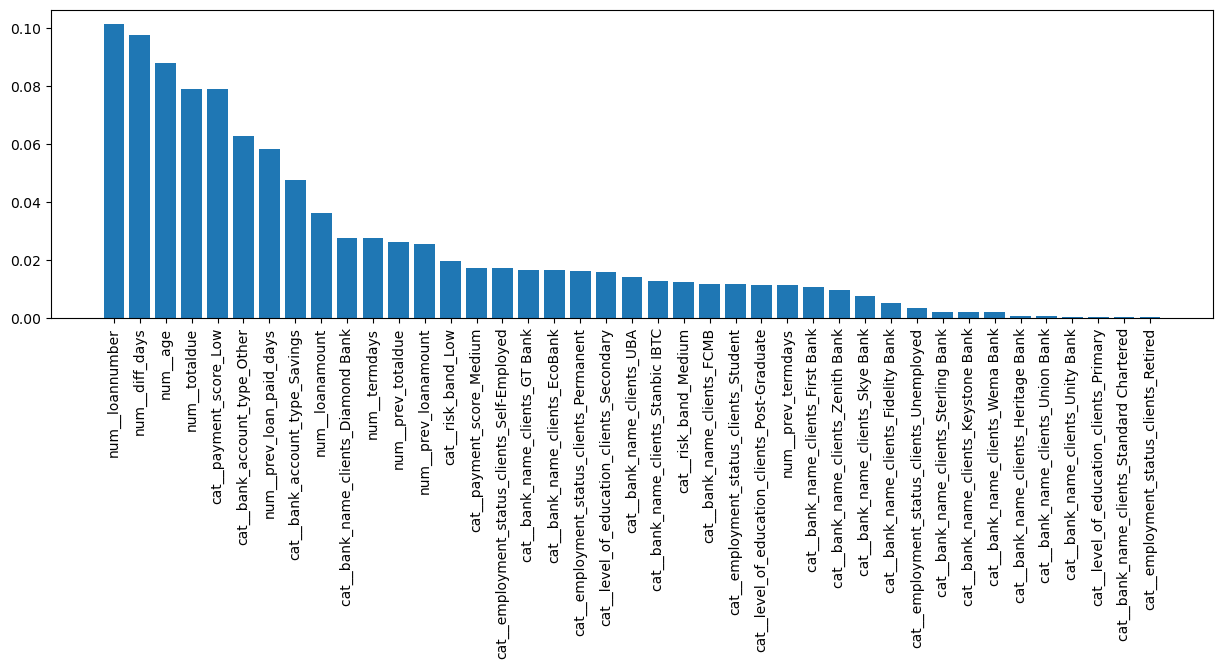

In [112]:
plt.figure(figsize=(15,4))

plt.bar(range(len(importance)),importance[sort])
plt.xticks(range(len(importance)),np.array(feature_names)[sort], rotation=90) 
plt.show()

### Save and Testing our model 

In [113]:
import pickle

In [114]:
# Define the final pipeline with the preprocessor and the Random Forest model before hyperparameter tuning
final_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', rf_model)
    ])

In [115]:
# fit it on the whole dataset
final_model.fit(x,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['loannumber', 'loanamount',
                                                   'termdays', 'totaldue',
                                                   'prev_loanamount',
                                                   'prev_totaldue',
                                                   'prev_termdays', 'age',
                                                   'prev_loan_paid_days',
                                                   'diff_days']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['bank_account_type',
                                                   'bank_name_clients',
                                                   'employment_status_clients',
                                                   'level_of_education_clients',
                                                   'risk_band',
                                                   'payment_score'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [116]:
# save the model using pickle
filename = 'loan_predictor.pkl'
pickle.dump(final_model, open(filename, 'wb'))

In [117]:
# new data
'loannumber', 'loanamount', 'termdays','bank_account_type', 'bank_name_clients', 'totaldue',
'employment_status_clients', 'level_of_education_clients',
'prev_loanamount', 'prev_totaldue', 'prev_termdays', 'age',
'prev_loan_paid_days', 'diff_days', 'risk_band', 'payment_score'

data = {
    'loannumber': [12],
    'loanamount': [30000.0],
    'termdays': [30],
    'bank_account_type': ['Other'],
    'bank_name_clients': ['Diamond Bank'],
    'totaldue': [34500.0],
    'employment_status_clients': ['Permanent'],
    'level_of_education_clients':['Post-Graduate'],
    'prev_loanamount' :[10000.0],
    'prev_totaldue' : [13000.0],
    'prev_termdays' : [30],
    'age' :[53],
    'prev_loan_paid_days':[16],
    'diff_days' :[0],
    'risk_band' :['Medium'],
    'payment_score': ['Medium']   
}

In [118]:
# Load 
model = pickle.load(open(filename, 'rb'))

In [119]:
# create our dataframe
df = pd.DataFrame(data)

In [120]:
df

loannumber  loanamount  termdays bank_account_type bank_name_clients  \
0          12     30000.0        30             Other      Diamond Bank   

   totaldue employment_status_clients level_of_education_clients  \
0   34500.0                 Permanent              Post-Graduate   

   prev_loanamount  prev_totaldue  prev_termdays  age  prev_loan_paid_days  \
0          10000.0        13000.0             30   53                   16   

   diff_days risk_band payment_score  
0          0    Medium        Medium

In [121]:
# use model for prediction 
Loan = model.predict(df)

In [122]:
# Interpret the prediction (assuming 0 for Bad, 1 for Good)
if Loan[0] == 1:
    print("The model predicts the loan will be 'Good'.")
else:
    print("The model predicts the loan will be 'Bad' .")

The model predicts the loan will be 'Good'.


In [123]:
n_df

loannumber  loanamount  termdays  good_bad_flag bank_account_type  \
0              12     30000.0        30              1             Other   
1              12     30000.0        30              1             Other   
2              12     30000.0        30              1             Other   
3              12     30000.0        30              1             Other   
4              12     30000.0        30              1             Other   
...           ...         ...       ...            ...               ...   
13688           8     30000.0        30              0           Savings   
13689           8     30000.0        30              0           Savings   
13690           8     30000.0        30              0           Savings   
13691           8     30000.0        30              0           Savings   
13692           8     30000.0        30              0           Savings   

      bank_name_clients  totaldue employment_status_clients  \
0          Diamond Bank   34500.0                 Permanent   
1          Diamond Bank   34500.0                 Permanent   
2          Diamond Bank   34500.0                 Permanent   
3          Diamond Bank   34500.0                 Permanent   
4          Diamond Bank   34500.0                 Permanent   
...                 ...       ...                       ...   
13688           GT Bank   34500.0                 Permanent   
13689           GT Bank   34500.0                 Permanent   
13690           GT Bank   34500.0                 Permanent   
13691           GT Bank   34500.0                 Permanent   
13692           GT Bank   34500.0                 Permanent   

      level_of_education_clients  prev_loanamount  prev_totaldue  \
0                  Post-Graduate          10000.0        13000.0   
1                  Post-Graduate          10000.0        13000.0   
2                  Post-Graduate          20000.0        23800.0   
3                  Post-Graduate          20000.0        24500.0   
4                  Post-Graduate          20000.0        24500.0   
...                          ...              ...            ...   
13688                   Graduate          10000.0        13000.0   
13689                   Graduate          20000.0        23800.0   
13690                   Graduate          20000.0        23800.0   
13691                   Graduate          10000.0        13000.0   
13692                   Graduate          30000.0        34500.0   

       prev_termdays  age  prev_loan_paid_days  diff_days risk_band  \
0                 30   53                   16         14    Medium   
1                 30   53                   29          1    Medium   
2                 30   53                   52        -22    Medium   
3                 30   53                   24          6    Medium   
4                 30   53                   26          4    Medium   
...              ...  ...                  ...        ...       ...   
13688             30   37                   20         10    Medium   
13689             30   37                   26          4    Medium   
13690             30   37                   27          3    Medium   
13691             30   37                   29          1    Medium   
13692             30   37                   23          7    Medium   

      payment_score  
0               Low  
1               Low  
2              High  
3               Low  
4               Low  
...             ...  
13688           Low  
13689           Low  
13690           Low  
13691           Low  
13692           Low  

[13673 rows x 17 columns]

In [124]:
n_df.level_of_education_clients.unique()

array(['Post-Graduate', 'Graduate', 'Primary', 'Secondary'], dtype=object)